# Data Analysis of real estate listings for the twin cities area

## Solution Methedology

I do not have to necessarily use all the features given in the dataset to solve all the questions but rather consider every question as a special problem that depends on a subset of the features in the dataset where this subset might be all the given features in the data but this depends on the question being asked.

## Data Exploration 

#### 1) Read the excel file in a pandas data frame 
#### 2) Get how many lisintgs are there in the data and how many features are there for each listing
#### 3) Get statistics for the numerical features in the dataset

In [52]:
# import pandas library
import pandas as pd

# Read the excel file in a pandas data frame and print the first 5 values to get an idea on how it looks like
dataset = pd.read_excel('AKQA_Dataset_Test.xlsx')
print dataset.head(5),'\n'

# Drop the LastSaleData feature since we will not use it 
dataset = dataset.drop('LastSaleDate',axis=1)

# Create new Age feature from the YearBuilt feature and add it to the dataset
dataset['age'] = 2014 - dataset['YearBuilt']

# Get dataset dimensions
dataset_dimensions = dataset.shape
print 'The dataset consists of: \n {} listings \n {} features for each listing \n'.format(dataset_dimensions[0], 
                                                                                          dataset_dimensions[1])

# Get statistics for numerical features in the dataset
print 'The descriptive statistics for the numerical values in the dataset are as follows: \n {}'.format(
    dataset.describe())

        ID                 ADDRESS       CITY STATE    ZIP  ListPrice  BEDS  \
0  4416206   1000 Larpenteur Ave W   St. Paul    MN  55113     214000     3   
1  4423768        1004 Charles Ave   St. Paul    MN  55104     134900     3   
2  4427963          1004 Euclid St   St. Paul    MN  55106     129722     4   
3  4432178  1005 Saint Anthony Ave   St. Paul    MN  55104     134900     2   
4  4440070      100X Chatsworth Pl  Shoreview    MN  55126     444900     4   

   BATHS                LOCATION  SQFT    ...      YearBuilt  ParkingSpots  \
0   2.00                    Como  1954    ...           1918             2   
1   1.00  Thomas-Dale (Frogtown)  1028    ...           1911             1   
2   1.00          Dayton's Bluff  1420    ...           1900             0   
3   1.75       Summit-University   904    ...           1928             3   
4   2.50               Shoreview  2014    ...           2014             3   

   HasGarage  DOM  LastSaleDate SoldPrev                

### Comments on the data

Its clear from seeing the statistics of the data is that some features have NAN points which greatly affect the statistics, these points might need to be discarded, however this decision will be made depending on wether the question depends on these points or not 

## Question 2 

### All things being equal what would you predict as the listing price for a 2111 square foot house if that was the only information you had on a house in this area? How did you arrive at that estimate? Please explain.

#### Solution
#### Since all other features are equal for all the listings except for the square footage of the houses and the listing prices then this becomes a regression problem where the input is the houses square footage and the output  is the prediction of the listing price, the solution is as follows:
#### 1) Generate a scatter plot of the square footage of the houses vs the listing prices of the house
#### 2) Based on the scatter plot, decide weather to fit linear or polynomial regression
#### 3) Get the listing price of the 2111 square foot house using the best fitted curve

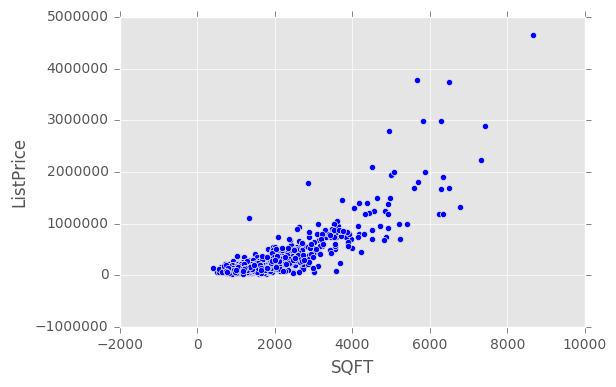

In [54]:
# import matplotlib library
import matplotlib.pyplot as plt
import numpy as np

# Get SQFT and List pricing data from the dataset
home_square_footage = np.array(dataset['SQFT']).reshape(-1,1)
listing_prices = np.array(dataset['ListPrice']).squeeze()

# Generate scatter plot for the houses
plt.scatter(home_square_footage, listing_prices)
plt.ylabel('ListPrice')
plt.xlabel('SQFT')
plt.show()



### Comments on the Scatter Plot 

Its Clear from the scatter plot of the data that the a ploynomial regression of a degree probably higher than 3 would be needed to non-linearly fit the data

### Define functions needed for testing polynomial curves with different degrees
        1) performance_metric(true values, predecited values) - measure performance of a classifier based on the the
        coefficient of determination score function 
        2) fit_model(input variable, output target variable) - fit model with different parameter values using cross 
        validation and a performance metric to determine the model with the highest performance

In [55]:
# import libraries needed for measuring model performance based on tuned parameters
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score as r2
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

# Function for determining the performance of a classifier
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true and predicted values based on the metric chosen. """

    score = r2(y_true, y_predict)

    # Return the score
    return score

# Fuction for fitting model on data with cross validation and parameter tuning
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)

    # TODO: Create a polynomial regression object
    regressor = make_pipeline(PolynomialFeatures(), Ridge())
    print regressor.get_params().keys()

    # TODO: Create a dictionary for the parameter 'degrees' with a range from 1 to 10
    params = {'polynomialfeatures__degree': [1, 2, 3 , 4 , 5 , 6, 7, 8, 9, 10]}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

['ridge__solver', 'ridge', 'polynomialfeatures__include_bias', 'polynomialfeatures__degree', 'ridge__max_iter', 'ridge__copy_X', 'ridge__alpha', 'polynomialfeatures__interaction_only', 'ridge__tol', 'steps', 'ridge__normalize', 'polynomialfeatures', 'ridge__random_state', 'ridge__fit_intercept']

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])


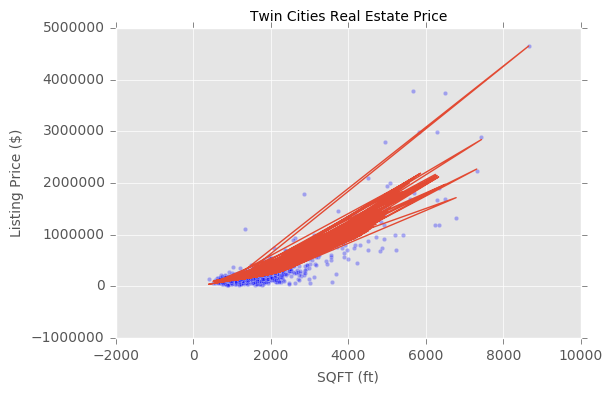

The listing price for a 2111 square foot house is $258699.210616


In [56]:
# Find best estimator with best tuned parameters
best_estimator = fit_model(sqft, listing_prices)
print '\n', best_estimator

# Get Prediction with the best estimator
predicted_listing_prices = best_estimator.predict(sqft)

# Plot scatter plot of the data
plt.scatter(sqft, listing_prices, s=10, alpha=0.3)

# plot predicted listing prices on the same plot
plt.plot(sqft, predicted_listing_prices)
plt.title("Twin Cities Real Estate Price", fontsize='10')
plt.xlabel('SQFT (ft)', fontsize='10')
plt.ylabel('Listing Price ($)', fontsize='10')
plt.show()
plt.savefig("TwinCities_real_estate_polynomial_regression.jpg", dpi=300)
plt.close()

print 'The listing price for a 2111 square foot house is ${}'.format(best_estimator.predict(2111)[0])


### Comments on the Prediction 

The prediction looks reasonable because, the square footage in question is close to the 75th percentile which is equal to 1964 ft which has a price of $2550000

## Question 1

### You are home developer looking to partner with the top real estate companies to acquire and then sell a large volume of properties in the Twin Cities area (the more the better). You do not have the resources to manage too many real estate partners and a strict timeline to negotiate the deals. What realty companies would you pick as your partners? Why would you make that choice? Demonstrate this through analysis, visual display of your results, and description of your methodology of selection.

#### Solution:
#### To Answer this question we will basically look at the companies with the following attributes:
#### 1) Highest number of listing previously sold
#### 2) Least Debt (Least number of short sales)
#### 3) The lowest amount of days on market
#### To determine these attributes we will need the following features from the dataset:
#### 1) Realty
#### 2) SoldPrev
#### 3) ShortSale
#### To Visualize the Data we will need to see the following graphs
#### 1) Realties vs number of houses owned
#### 2) Realties vs How many houses they sold previously
#### 3) Realties vs ShortSale 
#### But First we will have to preprocess this subset of features to make sure it is ready for a proper comparison between the realties, I started by sorting the realties in excel in ascending order and grouping the realties with different subdivisions togeather which reduced the count of the realties from 211 to 181 and stored that new data in the file 'AKQA_Dataset_edited.xlsx'

In [57]:
# TODO: Read the edited data set in a pandas Dataframe and print th first 5 values and generate descriptive statistics for the numberical features
dataset = pd.read_excel('AKQA_Dataset_edited.xlsx') # Read the dataset with ordered realty names and grouped realty subdivisions
dataset = dataset.drop('LastSaleDate', axis=1)
dataset['age'] = 2014 - dataset['YearBuilt']
dataset_dimensions = dataset.shape
print 'The dataset consists of: \n {} listings \n {} features for each listing \n'.format(dataset_dimensions[0], dataset_dimensions[1])

The dataset consists of: 
 1111 listings 
 21 features for each listing 



In [58]:
# Group the needed features togeather
data = {'Realty': dataset['Realty'], 'SoldPrev': dataset['SoldPrev'], 'ShortSale': dataset['ShortSale']}
q1data = pd.DataFrame(data)
print q1data.head(5)
print '\n', q1data.describe()

# Check if any of the features have empty values
print '\n Null Value Check = {}'.format(q1data.isnull().values.any())

                   Realty ShortSale SoldPrev
0             123 Realty          N        N
1  1st In Service Realty          N        N
2            Aden Realty          N        Y
3            Aden Realty          N        Y
4            Aden Realty          N        N

                       Realty ShortSale SoldPrev
count                    1111      1111     1111
unique                    181         2        2
top     RE/MAX Advantage Plus         N        N
freq                      266      1038      733

 Null Value Check = False


In [59]:
# Get the unique names of the realties
Realties = q1data['Realty']
Realties_unique = Realties.unique()
print '\n Here are the Realties available in the Cities:', '\n', Realties_unique, '\n'
print 'There are {} unique Realties'.format(len(Realties_unique))


 Here are the Realties available in the Cities: 
[u'123 Realty ' u'1st In Service Realty ' u'Aden Realty '
 u'Advisor Realty ' u'Advisors Realty ' u'Alliance Team Realty'
 u'Alternative Realty Concepts' u'Americas Realty Group '
 u'AmericAsian Realty' u'Anderson Realty' u'Anthony James Real Estate'
 u'Area Realty Professionals ' u'Around Town Realty ' u'Axis Realty'
 u'Banneker Realty ' u'Best Realty '
 u'Better Homes and Gardens Real Estate-All Seasons' u'Bjorklund Realty '
 u'BLIS Realty' u'Boardwalk Realty ' u'Branch Real Estate '
 u'Bridge Realty' u'Bridge Realty ' u'Bush Realty' u'BuySelf '
 u'C.U.Realty' u'Caibert Real Estate Solutions'
 u'Capital Property Management' u'Capitol Brokerage '
 u'Cardinal Realty Co.' u'Carlson Realty Group' u'Cedar Realty '
 u'Century 21 Premier Group' u'Coldwell Banker Burnet' u'Counselor Realty'
 u'Counselor Realty ' u'Creative Edge Realty ' u'Creek Realty'
 u'Customer Driven Realty' u'Dave Brown REALTORS' u'DeLisle Company '
 u'DirectByOwner.com'

In [60]:
# Create a Dataframe for all companies vs number of listings, SoldPrev, DOM, ShortSale
realty_statistcs = pd.DataFrame(index=Realties_unique, columns=['nListings', 'SoldPrev', 'ShortSale'])

for realty in Realties_unique:
    for feature in realty_statistcs.columns:
        if feature == 'nListings':
            value_c = q1data[(q1data.Realty == realty)].count().get_value('Realty')
            realty_statistcs.set_value(realty, feature, value_c)
        elif feature == 'SoldPrev':
            value_c = q1data[(q1data.Realty == realty) & (q1data.SoldPrev == 'Y')].count().get_value('Realty')
            realty_statistcs.set_value(realty, feature, value_c)
        elif feature == 'ShortSale':
            value_c = q1data[(q1data.Realty == realty) & (q1data.ShortSale == 'Y')].count().get_value('Realty')
            realty_statistcs.set_value(realty, feature, value_c)
print realty_statistcs.head(5)

                       nListings SoldPrev ShortSale
123 Realty                     1        0         0
1st In Service Realty          1        0         0
Aden Realty                    3        2         0
Advisor Realty                 1        1         0
Advisors Realty                5        2         0


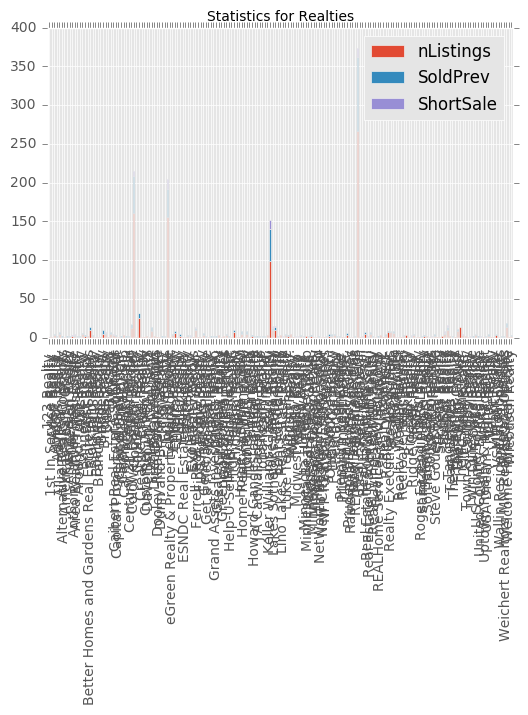

In [61]:
# Plot the statistics for all the realties
plt.style.use('ggplot')
realty_statistcs.plot.bar(stacked=True)
plt.title("Statistics for Realties", fontsize='10')
plt.show()
plt.savefig("Realties statistics.jpg", dpi=300)
plt.close()

### Comment on Plot 
Since our major priority is more sales then we need to filter the realties according to the number of listings more than about 90 and then plot the statistics for those filtered realties


                               nListings SoldPrev ShortSale
Coldwell Banker Burnet               161       47         7
Edina Realty                         155       37        12
Keller Williams Classic Realty        99       41        11
RE/MAX Advantage Plus                266       96        12


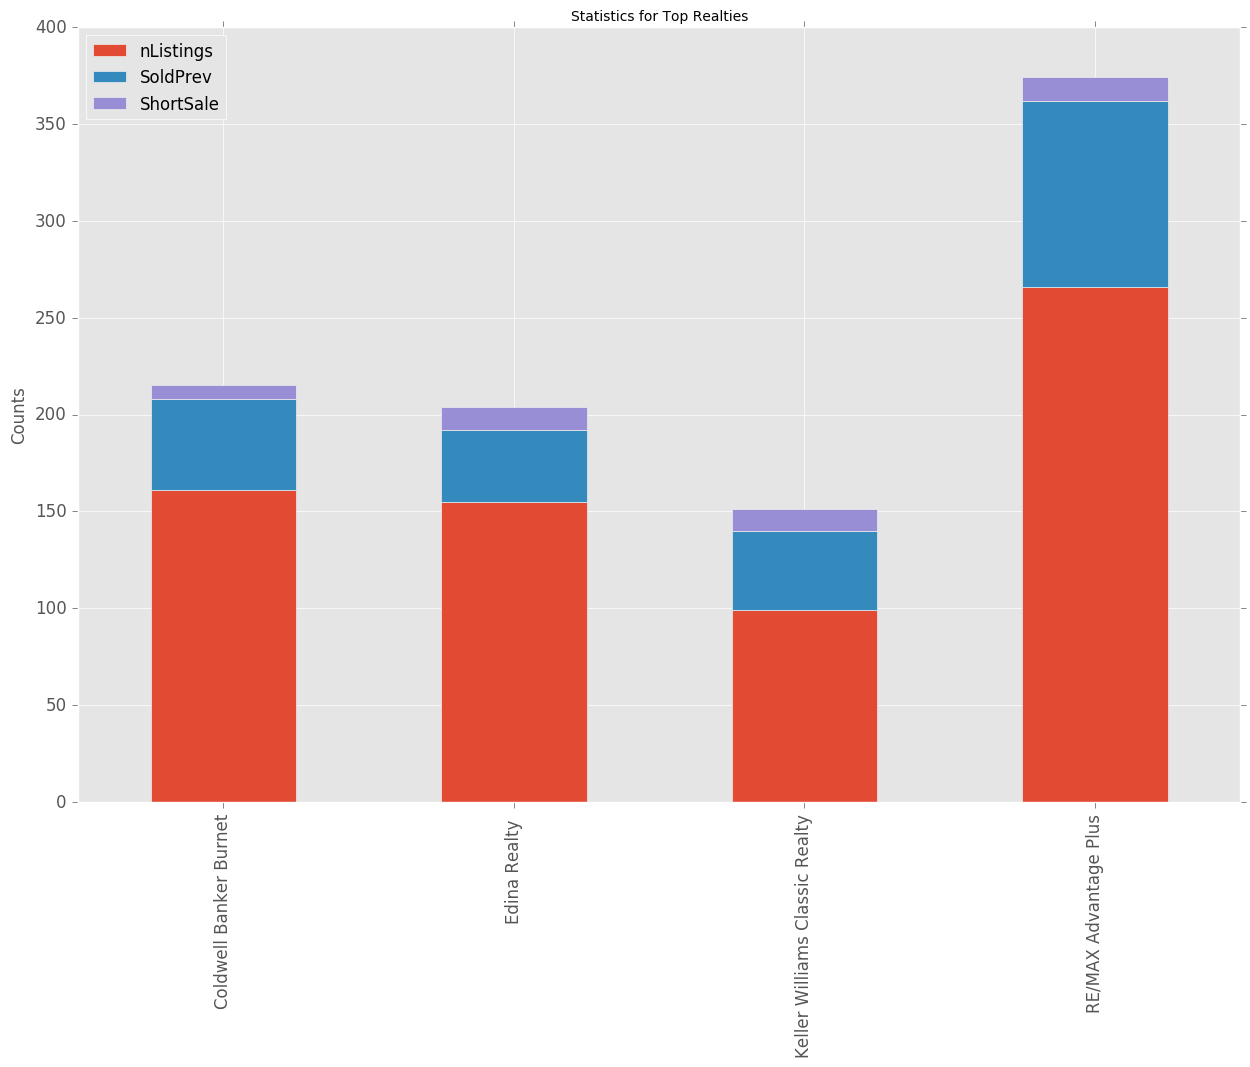

In [62]:
# Filter Companies according to the number of listings > 90
realty_statistcs = realty_statistcs[realty_statistcs.nListings > 90]
# Show the remaining ones after the filtering
print realty_statistcs
# Plot the statistics for the filtered realties
realty_statistcs.plot.bar(stacked=True, figsize=(15, 10), fontsize=12)
plt.title("Statistics for Top Realties", fontsize='10')
plt.ylabel('Counts')
plt.savefig("Top Realties statistics.jpg", dpi=300)
plt.show()
plt.close()


### Comment on Plot 

From the final plot and the data description, I will choose:
1) Coldwell Banker Burnet
2) RE/MAX Advantage Plus  
Because they have the highest amount of listings, highest amount of sales and least amount of short sales relative to the other 2 realties


## Question 3 

### Imagine you are an enterprising real estate agent who has the chance to buy up a bundle of houses for sale – but you can only pick one zip code (either 55104 or 55108).Also, you can only buy a bundle of properties priced within the middle 50% of the values – you won’t be able to buy the most expensive houses or the cheapest houses.Assume the sample of houses in this dataset is representative for those zip codes. If you had the choice to buy 1000 homes in either 55104 or 55108 which zip code would you invest in and why? Provide your analysis and reasoning.

#### Solution:
#### If we assume that the dataset is representative of the 2 zipcodes in questions than we could consider this as a  classification problem where the target is SoldPrev = Sold = [Y, N] where SoldPrev tells us wether a home with the given features is actually sellable or not. So as an investor I will pick the houses that will sell more so the steps are as follows:
#### 1) Take out the data in the middle 50% of the values and separate it into equal values according to the minimum number of houses(55104, 55108)
#### 2) Train a random forest classifier on the middle 50% of the data 
#### 3) Pass zip codes to the classifier
#### 4) figure out which one to buy from based on the one that will sell more

In [63]:
# Pick the Features that will be used for the classification
features = {'ListPrice': dataset['ListPrice'], 'BEDS': dataset['BEDS'], 'BATHS': dataset['BATHS'], 'SQFT': dataset['SQFT'], 'age': dataset['age'], 'SoldPrev': dataset['SoldPrev'],
            'ZIP': dataset['ZIP']}
dataset_new = pd.DataFrame(features)

In [64]:
# Get training set from datase_new, it will include all zips
ListPrice_25 = dataset_new.ListPrice.quantile(0.25)
ListPrice_75 = dataset_new.ListPrice.quantile(0.75)

train = dataset_new[((dataset_new.ListPrice > ListPrice_25) & (dataset_new.ListPrice < ListPrice_75)) & ((dataset_new.ZIP != 55104) & (dataset_new.ZIP != 55108))]

train_x = train.drop(['ZIP','SoldPrev',], axis=1)
train_y = train['SoldPrev']
train_y = train_y.replace(['Y', 'N'], [1, 0])

In [65]:
# Get data between the 25th percentile and 75th percentile and in ZIPS 55104 55108


zip104 = dataset_new[((dataset_new.ListPrice > ListPrice_25) & (dataset_new.ListPrice < ListPrice_75)) & (dataset_new.ZIP == 55104)]
zip104 = zip104.drop(['ZIP', 'SoldPrev'], axis=1)
print 'Zip 55104 test set \n'
print zip104.columns.values
print zip104.describe()

zip108 = dataset_new[((dataset_new.ListPrice > ListPrice_25) & (dataset_new.ListPrice < ListPrice_75)) & (dataset_new.ZIP == 55108)]
zip108 = zip108.drop(['ZIP', 'SoldPrev'], axis=1)
print 'Zip 55108 test set \n'
print zip108.columns.values
print zip108.describe(), '\n'

# get 10 random values from zip 55104 to make a fair test
zip104 = zip104.sample(10)

print 'Zip 55104 10 samples description', zip104.describe()


Zip 55104 test set 

['BATHS' 'BEDS' 'ListPrice' 'SQFT' 'age']
           BATHS       BEDS      ListPrice         SQFT         age
count  47.000000  47.000000      47.000000    47.000000   47.000000
mean    1.382979   3.106383  157856.042553  1393.106383   95.617021
std     0.474488   0.865625   25505.083696   388.923276   22.544211
min     0.750000   1.000000  124100.000000   676.000000   10.000000
25%     1.000000   3.000000  139900.000000  1138.000000   89.000000
50%     1.000000   3.000000  152900.000000  1358.000000  101.000000
75%     1.750000   4.000000  169900.000000  1601.000000  108.000000
max     2.750000   5.000000  249000.000000  2870.000000  128.000000
Zip 55108 test set 

['BATHS' 'BEDS' 'ListPrice' 'SQFT' 'age']
           BATHS       BEDS      ListPrice         SQFT         age
count  10.000000  10.000000      10.000000    10.000000   10.000000
mean    1.425000   2.800000  208869.900000  1507.200000   90.400000
std     0.391755   0.632456   28891.538055   300.773374   

In [73]:
# Import the Random forest Classifier Library
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest on the training set
rfc = RandomForestClassifier(n_estimators= 50)
rfc.fit(train_x, train_y)

# Predict Selling for the two zip codes
zip104_pred = rfc.predict(zip104)
print 'predictions for zip 55104 \n {}'.format(zip104_pred)

zip108_pred = rfc.predict(zip108)
print 'predictions for zip 55108 \n {}'.format(zip108_pred)

predictions for zip 55104 
 [1 1 0 0 0 0 0 0 1 0]
predictions for zip 55108 
 [0 1 0 0 0 0 0 0 0 0]


### Comment on Result
Since zip 55104 is predicted to sell much more than zip 55108 than I will pick 1000 houses from zip 55104, of course a bigger dataset would help get a better prediction, but I am working with what I here

## Question 4 

### We’re looking to understand what features of the home are most important to potentially predicting the list price of a house. What has the strongest relationship to listing price: square foot, lot size, or number of bedrooms? How do they compare? Please explain.

#### Solution:
#### To Solve this Question I will consider the 3 features in question and the listing price as 1 dimensional vectors and will cross correlate every feature with the price and then get the feature with highest corellation value but first, I will have to preprocess the data by removing the NULL values if they exist in the vectors 

In [74]:
# Pick the Features that will be used for the classification
features = {'ListPrice': dataset['ListPrice'], 'BEDS': dataset['BEDS'], 'LotSize': dataset['LotSize'], 'SQFT': dataset['SQFT']}
dataset_corr = pd.DataFrame(features)

print dataset_corr.describe()

# Remove listings where Lotsize and BATHS are not = NULL
if dataset_corr.isnull().values.any():
    dataset_corr = dataset_corr.dropna()

print dataset_corr.describe()

# Correlate every feature with the list price and decide
ListPrice = dataset_corr['ListPrice']
print np.corrcoef(dataset_corr['BEDS'], ListPrice)
print np.corrcoef(dataset_corr['LotSize'], ListPrice)
print np.corrcoef(dataset_corr['SQFT'], ListPrice)


              BEDS     ListPrice        LotSize         SQFT
count  1111.000000  1.111000e+03    1047.000000  1111.000000
mean      3.189019  2.714080e+05    6688.906399  1781.702070
std       0.954036  3.730517e+05    7350.277745   980.032525
min       1.000000  1.990000e+04    1001.000000   396.000000
25%       3.000000  1.200000e+05            NaN  1213.500000
50%       3.000000  1.650000e+05            NaN  1536.000000
75%       4.000000  2.550000e+05            NaN  1964.000000
max       8.000000  4.650000e+06  136778.000000  8655.000000
              BEDS     ListPrice        LotSize         SQFT
count  1047.000000  1.047000e+03    1047.000000  1047.000000
mean      3.194842  2.733096e+05    6688.906399  1788.543457
std       0.948105  3.761873e+05    7350.277745   973.135581
min       1.000000  1.990000e+04    1001.000000   510.000000
25%       3.000000  1.200000e+05    4791.000000  1219.000000
50%       3.000000  1.687970e+05    5227.000000  1543.000000
75%       4.000000  2.59

### Comment on Result
The highest Correlation coefficient is 0.82 for the SQFT, therefore, SQFT has the strongest relation to the listing price when comparing it with the LotSize and the number of Bedrooms

## Question 6

### We’d like to understand how listings compare with the population in their area. Take the zip code data in the 2nd sheet and match against the house listing data. What zip codes have the highest amount of listings per the population size? Show the top 10. Separately, what zip code has the highest listing price per person? Google that zip code and provide some hypothesis and examples as to why this might be true.

This Question is straight forward, I will do it In MATLAB

<!DOCTYPE html
  PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html><head>
      <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
   <!--
This HTML was auto-generated from MATLAB code.
To make changes, update the MATLAB code and republish this document.
      --><title>Question_6</title><meta name="generator" content="MATLAB 9.0"><link rel="schema.DC" href="http://purl.org/dc/elements/1.1/"><meta name="DC.date" content="2017-02-25"><meta name="DC.source" content="Question_6.m"><style type="text/css">
html,body,div,span,applet,object,iframe,h1,h2,h3,h4,h5,h6,p,blockquote,pre,a,abbr,acronym,address,big,cite,code,del,dfn,em,font,img,ins,kbd,q,s,samp,small,strike,strong,sub,sup,tt,var,b,u,i,center,dl,dt,dd,ol,ul,li,fieldset,form,label,legend,table,caption,tbody,tfoot,thead,tr,th,td{margin:0;padding:0;border:0;outline:0;font-size:100%;vertical-align:baseline;background:transparent}body{line-height:1}ol,ul{list-style:none}blockquote,q{quotes:none}blockquote:before,blockquote:after,q:before,q:after{content:'';content:none}:focus{outine:0}ins{text-decoration:none}del{text-decoration:line-through}table{border-collapse:collapse;border-spacing:0}

html { min-height:100%; margin-bottom:1px; }
html body { height:100%; margin:0px; font-family:Arial, Helvetica, sans-serif; font-size:10px; color:#000; line-height:140%; background:#fff none; overflow-y:scroll; }
html body td { vertical-align:top; text-align:left; }

h1 { padding:0px; margin:0px 0px 25px; font-family:Arial, Helvetica, sans-serif; font-size:1.5em; color:#d55000; line-height:100%; font-weight:normal; }
h2 { padding:0px; margin:0px 0px 8px; font-family:Arial, Helvetica, sans-serif; font-size:1.2em; color:#000; font-weight:bold; line-height:140%; border-bottom:1px solid #d6d4d4; display:block; }
h3 { padding:0px; margin:0px 0px 5px; font-family:Arial, Helvetica, sans-serif; font-size:1.1em; color:#000; font-weight:bold; line-height:140%; }

a { color:#005fce; text-decoration:none; }
a:hover { color:#005fce; text-decoration:underline; }
a:visited { color:#004aa0; text-decoration:none; }

p { padding:0px; margin:0px 0px 20px; }
img { padding:0px; margin:0px 0px 20px; border:none; }
p img, pre img, tt img, li img, h1 img, h2 img { margin-bottom:0px; } 

ul { padding:0px; margin:0px 0px 20px 23px; list-style:square; }
ul li { padding:0px; margin:0px 0px 7px 0px; }
ul li ul { padding:5px 0px 0px; margin:0px 0px 7px 23px; }
ul li ol li { list-style:decimal; }
ol { padding:0px; margin:0px 0px 20px 0px; list-style:decimal; }
ol li { padding:0px; margin:0px 0px 7px 23px; list-style-type:decimal; }
ol li ol { padding:5px 0px 0px; margin:0px 0px 7px 0px; }
ol li ol li { list-style-type:lower-alpha; }
ol li ul { padding-top:7px; }
ol li ul li { list-style:square; }

.content { font-size:1.2em; line-height:140%; padding: 20px; }

pre, code { font-size:12px; }
tt { font-size: 1.2em; }
pre { margin:0px 0px 20px; }
pre.codeinput { padding:10px; border:1px solid #d3d3d3; background:#f7f7f7; }
pre.codeoutput { padding:10px 11px; margin:0px 0px 20px; color:#4c4c4c; }
pre.error { color:red; }

@media print { pre.codeinput, pre.codeoutput { word-wrap:break-word; width:100%; } }

span.keyword { color:#0000FF }
span.comment { color:#228B22 }
span.string { color:#A020F0 }
span.untermstring { color:#B20000 }
span.syscmd { color:#B28C00 }

.footer { width:auto; padding:10px 0px; margin:25px 0px 0px; border-top:1px dotted #878787; font-size:0.8em; line-height:140%; font-style:italic; color:#878787; text-align:left; float:none; }
.footer p { margin:0px; }
.footer a { color:#878787; }
.footer a:hover { color:#878787; text-decoration:underline; }
.footer a:visited { color:#878787; }

table th { padding:7px 5px; text-align:left; vertical-align:middle; border: 1px solid #d6d4d4; font-weight:bold; }
table td { padding:7px 5px; text-align:left; vertical-align:top; border:1px solid #d6d4d4; }





  </style></head><body><div class="content"><pre class="codeinput">clc; clear; close <span class="string">all</span>;
data_sheet2=xlsread(<span class="string">'Dataset.xlsx'</span>,2);
[num,str,raw]=xlsread(<span class="string">'Dataset.xlsx'</span>,1);
zipcode=data_sheet2(:,1);
population=data_sheet2(:,2);
twincity_zipcode=num(:,5);
listing=zeros(33092,1);
list_per_pop=zeros(33092,1);
<span class="keyword">for</span> i=1:33092
    current_zip=zipcode(i,1);
    <span class="keyword">for</span> j=1:1111
        <span class="keyword">if</span>(current_zip==twincity_zipcode(j,1))
            listing(i,1)=listing(i,1)+1;
        <span class="keyword">end</span>
    <span class="keyword">end</span>
<span class="keyword">end</span>
<span class="keyword">for</span> i=1:33092
    <span class="keyword">if</span>(population(i,1)==0)
        list_per_pop(i,1)=0;
    <span class="keyword">else</span>
    list_per_pop(i,1)=listing(i,1)/population(i,1);
    <span class="keyword">end</span>
<span class="keyword">end</span>
[B,I] = sort(list_per_pop,<span class="string">'descend'</span>) ;
required_zip=zeros(10,1);
<span class="comment">%part a result</span>
<span class="keyword">for</span> i=1:10
    required_zip(i,1)=zipcode(I(i,1),1);
<span class="keyword">end</span>
<span class="comment">%part b result</span>

ratio=zeros(1111,1);
<span class="keyword">for</span> i=1:1111
    current_zip=twincity_zipcode(i,1);
    <span class="keyword">for</span> j=1:33092
        <span class="keyword">if</span>(current_zip==data_sheet2(j,1))
           cur_population=data_sheet2(j,2);
        <span class="keyword">end</span>
    <span class="keyword">end</span>
    ratio(i,1)=num(i,6)/cur_population;
<span class="keyword">end</span>
[max_listprice_pop,index] = sort(ratio,<span class="string">'descend'</span>) ;
list_zip=num(index(1,1),5);
display(<span class="string">'top 10 zip codes with highest amount of listing per population size'</span>);
required_zip
display(<span class="string">'zip code with highest listing price per person'</span>);
list_zip

<span class="comment">% Comments on Zip Code with highest listing price per person:</span>
<span class="comment">% After Googling this zip code, I found that the c;ass of the people in</span>
<span class="comment">% this zip code are mostly middle high class, which explains the price of</span>
<span class="comment">% this zip code</span>
</pre><pre class="codeoutput">top 10 zip codes with highest amount of listing per population size

required_zip =

       55412
       55410
       55106
       55417
       55406
       55419
       55107
       55105
       55116
       55104

zip code with highest listing price per person

list_zip =

       55405

</pre><p class="footer"><br><a href="http://www.mathworks.com/products/matlab/">Published with MATLAB&reg; R2016a</a><br></p></div><!--
##### SOURCE BEGIN #####
clc; clear; close all;
data_sheet2=xlsread('Dataset.xlsx',2);
[num,str,raw]=xlsread('Dataset.xlsx',1);
zipcode=data_sheet2(:,1);
population=data_sheet2(:,2);
twincity_zipcode=num(:,5);
listing=zeros(33092,1);
list_per_pop=zeros(33092,1);
for i=1:33092
    current_zip=zipcode(i,1);
    for j=1:1111
        if(current_zip==twincity_zipcode(j,1))
            listing(i,1)=listing(i,1)+1;
        end
    end
end
for i=1:33092
    if(population(i,1)==0)
        list_per_pop(i,1)=0;
    else
    list_per_pop(i,1)=listing(i,1)/population(i,1);
    end
end
[B,I] = sort(list_per_pop,'descend') ;
required_zip=zeros(10,1);
%part a result
for i=1:10
    required_zip(i,1)=zipcode(I(i,1),1);
end
%part b result

ratio=zeros(1111,1);
for i=1:1111
    current_zip=twincity_zipcode(i,1);
    for j=1:33092
        if(current_zip==data_sheet2(j,1))
           cur_population=data_sheet2(j,2);
        end
    end
    ratio(i,1)=num(i,6)/cur_population;
end
[max_listprice_pop,index] = sort(ratio,'descend') ;
list_zip=num(index(1,1),5);
display('top 10 zip codes with highest amount of listing per population size');
required_zip
display('zip code with highest listing price per person');
list_zip

% Comments on Zip Code with highest listing price per person:
% After Googling this zip code, I found that the c;ass of the people in
% this zip code are mostly middle high class, which explains the price of
% this zip code
    
    
    


##### SOURCE END #####
--></body></html>

### Comment on Result

After Googling this zip code, I found that the class of the people in this zip code are mostly middle high class, which explains the price of this zip code

## Question 7

### You’ve just been hired as a data scientist at the premier real estate firm in this area. They want to forecast the actual sales price for any of these listings (and future listings). What variables from this example data do you think would be the most predictive of the actual sales price? What other kinds of data would you want have to provide the most accurate prediction of the actual sales price? Assume you can get any data you want. Describe this data clearly and why you think it would help you build an accurate predictive model.

#### Solution:
#### I will split the data into Training and Testing sets and run a random forest regressor on the data and get the best parameters for the listing Price as a target value
    

In [75]:
# import RandomforestRegressor and train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split

#TODO: Read data set in a pandas Dataframe and print th first 5 values and generate descriptive statistics for the numberical features
dataset = pd.read_excel('AKQA_Dataset_edited.xlsx')
dataset = dataset.drop('LastSaleDate', axis=1)
dataset['age'] = 2014 - dataset['YearBuilt']
dataset_dimensions = dataset.shape
print 'The dataset consists of: \n {} listings \n {} features for each listing \n'.format(dataset_dimensions[0], dataset_dimensions[1])
print 'Dataset before removing Null listings: \n', dataset.describe()

# remove NULL listing from the data set
dataset = dataset.dropna()
print 'Dataset after removing Null listings: \n', dataset.describe()
print dataset.describe()

# convert Categorial features into dummies and Yes No features into binary values
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''

    # Initialize new output DataFrame
    output = pd.DataFrame(index=X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():

        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix=col)

            # Collect the revised columns
        output = output.join(col_data)

    return output
dataset_pp = preprocess_features(dataset)

# Create Training Set and Test Set
Target_Prices = dataset_pp['ListPrice']
dataset_pp = dataset_pp.drop(['ListPrice', 'ID'], axis=1)

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(dataset_pp, Target_Prices, test_size=0.3,random_state=10)

# Create and fit classifier to data
rfr = RandomForestRegressor(200)
rfr.fit(X_train, y_train)

# print the feature importances
feature_importance = list(rfr.feature_importances_)
feature_importance_ind = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k],reverse=True)
features = list(dataset_pp.columns.values)

# Create a dataframe with for the feature importances
features_values_print = []
features_values_names = []
n = 10
for i in range(0,n):
    features_values_print.append(feature_importance[feature_importance_ind[i]])
    features_values_names.append(features[feature_importance_ind[i]])

print features_values_print
print features_values_names


The dataset consists of: 
 1111 listings 
 21 features for each listing 

Dataset before removing Null listings: 
                ZIP     ListPrice         BEDS        BATHS         SQFT  \
count   1111.000000  1.111000e+03  1111.000000  1110.000000  1111.000000   
mean   55270.833483  2.714080e+05     3.189019     1.722748  1781.702070   
std      151.463688  3.730517e+05     0.954036     0.810625   980.032525   
min    55101.000000  1.990000e+04     1.000000     0.750000   396.000000   
25%    55106.000000  1.200000e+05     3.000000          NaN  1213.500000   
50%    55406.000000  1.650000e+05     3.000000          NaN  1536.000000   
75%    55412.000000  2.550000e+05     4.000000          NaN  1964.000000   
max    55430.000000  4.650000e+06     8.000000     5.750000  8655.000000   

             LotSize    YearBuilt  ParkingSpots          DOM     LATITUDE  \
count    1047.000000  1111.000000   1111.000000  1111.000000  1105.000000   
mean     6688.906399  1932.989199      1.885689

The most predictive variables are SQFT, BATHS, LATITUDE, LONGITUDE
Therefore the 2 features I would add are crime rate and proxmity to water since these two are closely related to the LATITUDE And LONGITUDE of the homees and would greatly affect prediction